In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.8.17


In [3]:
# Imports

# Manipulação de dados
import pandas as pd
import numpy as np

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import missingno

# Estatística
import scipy
from scipy.stats import normaltest
from scipy.stats import chi2_contingency

# Engenharia de Atributos
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

/opt/homebrew/Caskroom/miniconda/base/envs/dsa/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [ ]:
#!pip install seaborn==0.11.1
#!pip install category_encoders==2.2.2
#!pip install missingno==0.5.0
#!pip install pandas==1.3.3
#!pip install plotly==5.3.1
#!pip install scipy==1.6.2
#!pip install matplotlib==3.4.3
#!pip install numpy==1.21.2

## Carregando os Dados

In [4]:
#Carrega dataset 
df = pd.read_csv('dataset/aug_train.csv')

In [5]:
#Shape
df.shape

(19158, 14)

In [6]:
#Colunas
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [7]:
#Amostra dos dados 
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [8]:
#Info 
#Obs.: a coluna target é do tipo categórica, mas o python entendeu como float. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

## Análise Exploratória de Dados 

In [9]:
# descrevendo os dados não numéricos 
# Obs.: estatistícas de uma variável categórica 
df.describe(include=object)

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
count,19158,14650,19158,18772,18698,16345,19093,13220,13018,18735
unique,123,3,2,3,5,6,22,8,6,6
top,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1
freq,4355,13221,13792,13817,11598,14492,3286,3083,9817,8040


In [10]:
# Descrevendo os dados numéricos 
# Obs.: estou dropando as variáveis que eu sei que não são numéricas (mas o interpretador do python definiu como numérica)
df.describe().drop(columns=['enrollee_id', 'target'])

,city_development_index,training_hours
count,19158.000000,19158.000000
mean,0.828848,65.366896
std,0.123362,60.058462
min,0.448000,1.000000
25%,0.740000,23.000000
50%,0.903000,47.000000
75%,0.920000,88.000000
max,0.949000,336.000000


* Em **city_development_index** (CDI), os valores médios são 0,828, mediana 0,903 e std 0,123. Isso significa que a maioria dos candidatos é de cidades bem desenvolvidas.


* Em **training_hours**, os valores médios são 65,367, mediana 47 e max 336. Isso significa que há mais candidatos com poucas horas de treinamento, mas alguns candidatos gastam muito tempo para fazer o treinamento.

### Visualizando as Variáveis Categóricas

In [11]:
#Obs.: fazendo uma lista das colunas do tipo object
list(df.columns.values)[3:12]

['gender',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job']

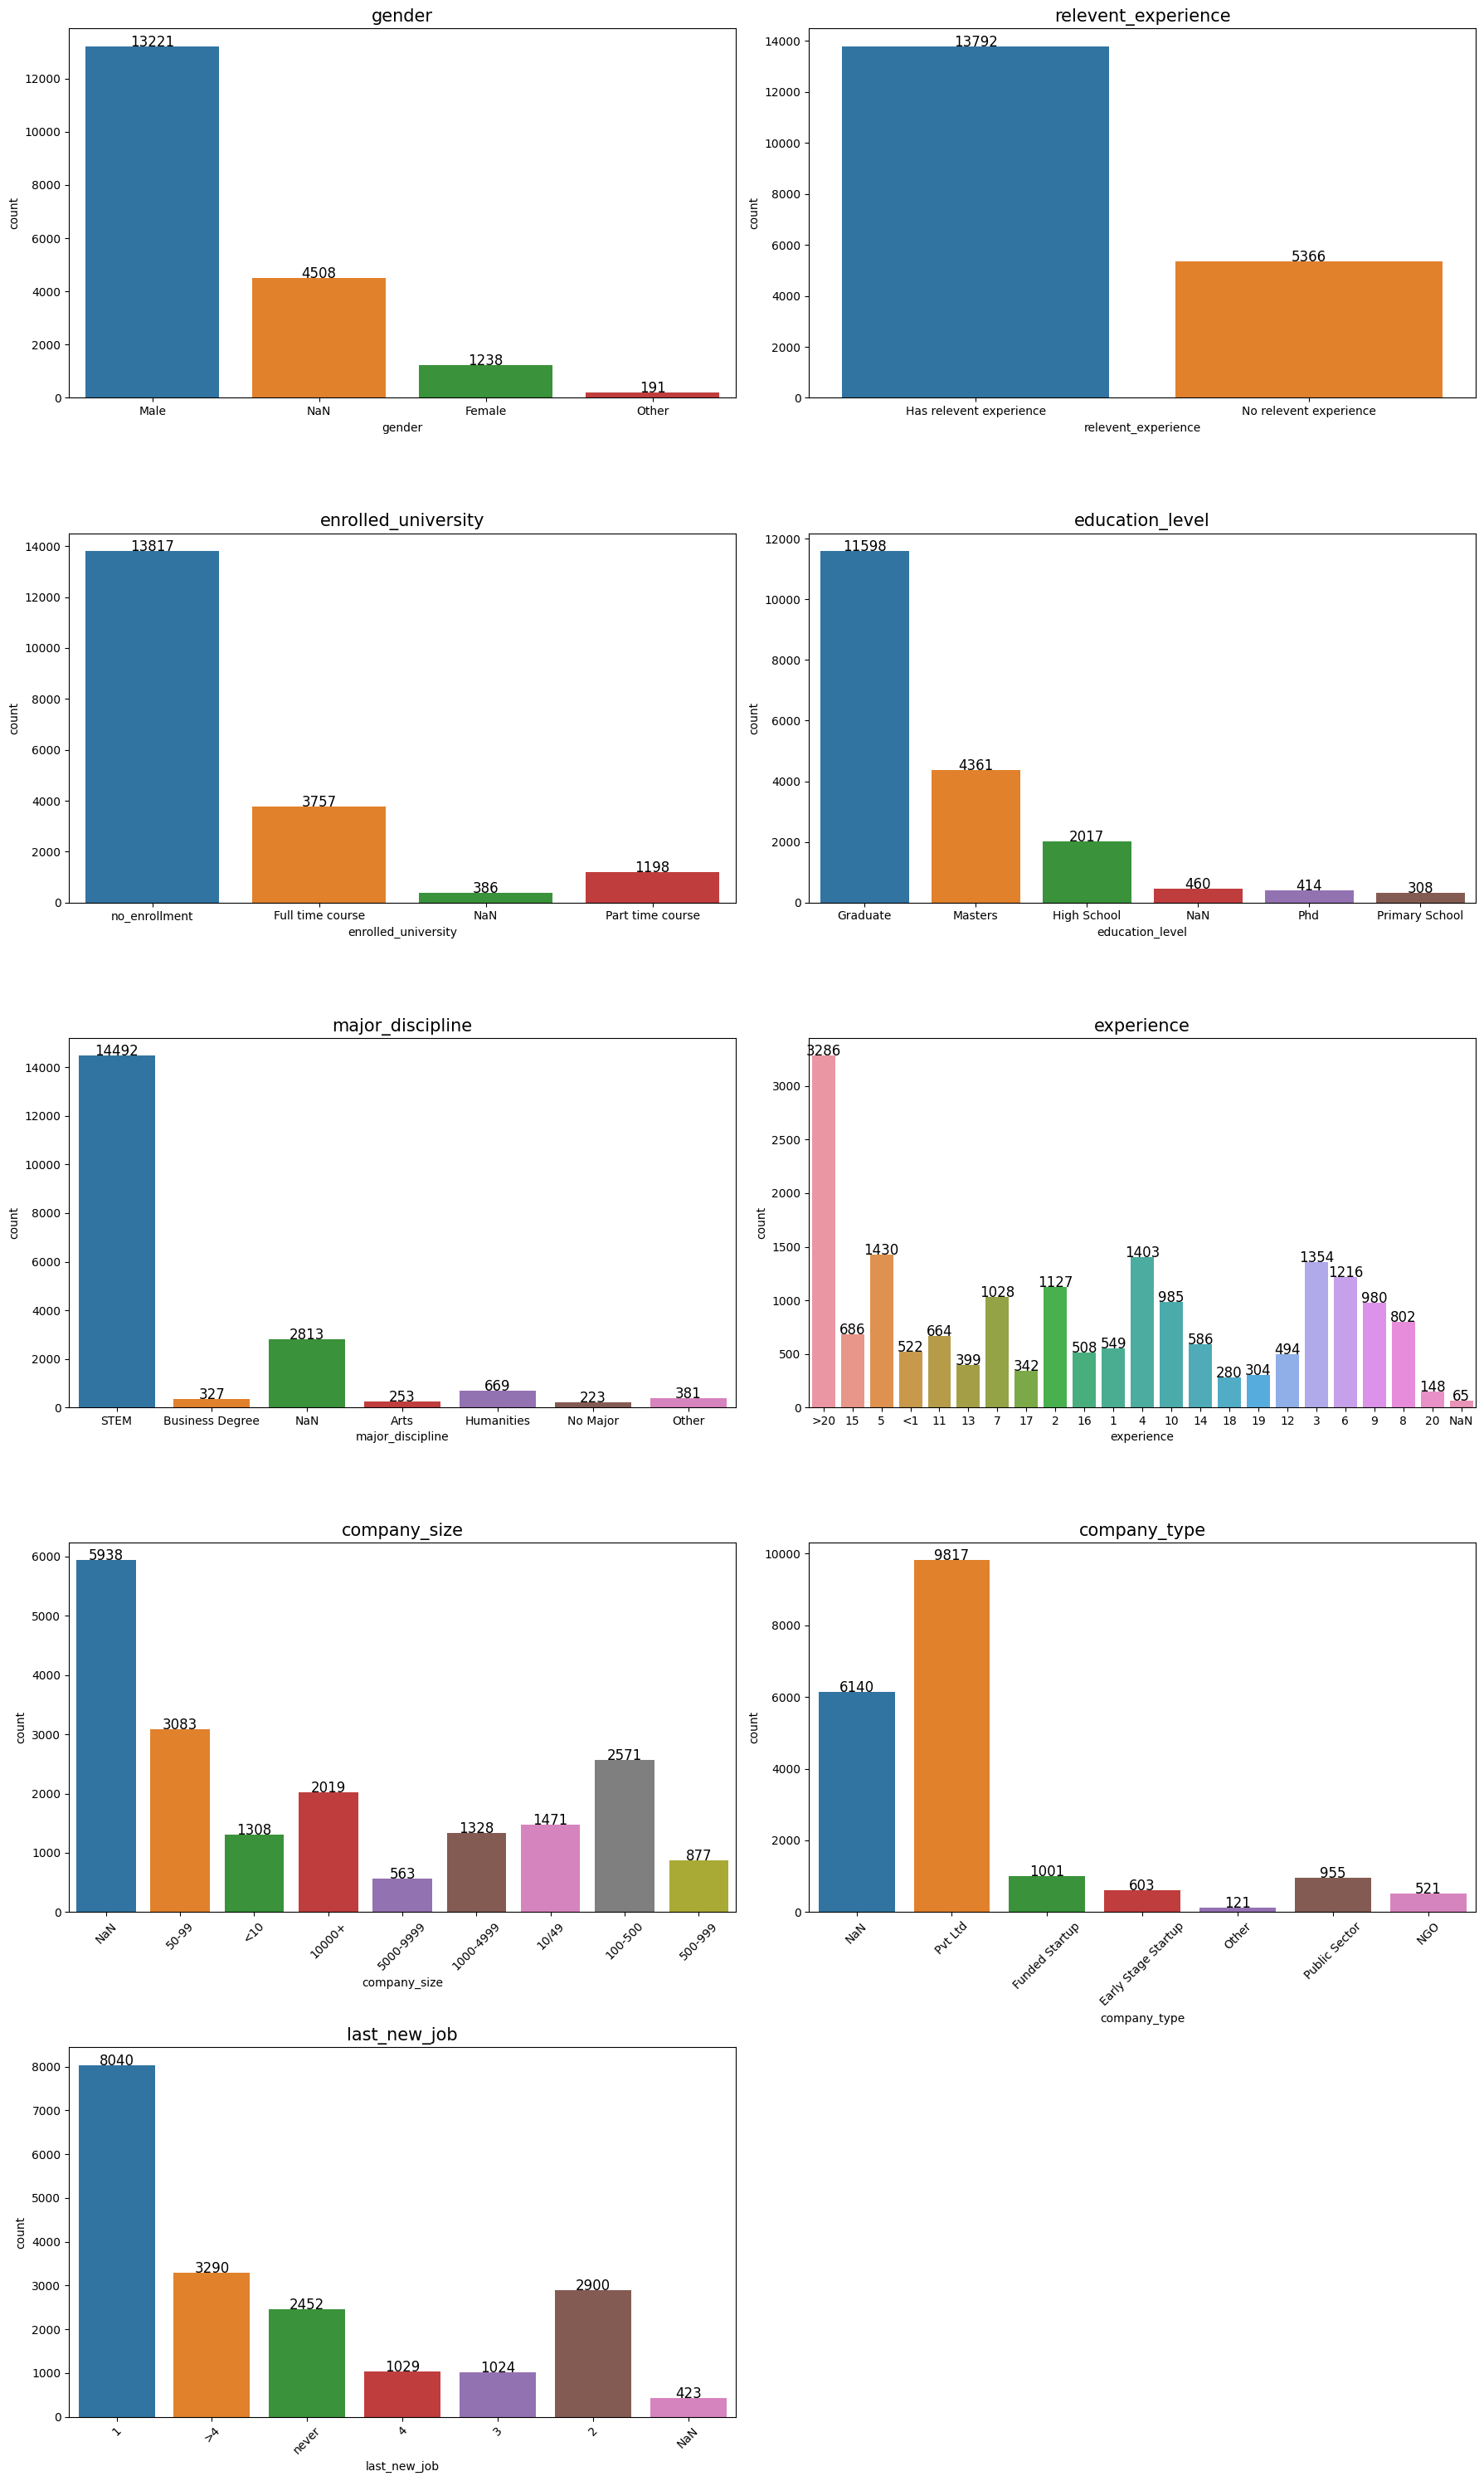

In [12]:
# Plot

# Tamanho da figura
plt.figure(figsize = (18,30))

# Lista de colunas
column_list = list(df.columns.values)[3:12]

# Contador
A = 0

# Loop
for i in column_list:
    A += 1
    plt.subplot(5, 2, A)
    ax = sns.countplot(data = df.fillna('NaN'), x = i)
    plt.title(i, fontsize = 15)
    for p in ax.patches:
        ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 12)
    if A >= 7:
        plt.xticks(rotation = 45)

# Layout
plt.tight_layout(h_pad = 2)

In [13]:
import plotly.graph_objects as go 

In [16]:
# Separando a contagem da variável para plotar no gráfico 
# Não esquecer de preencher com NaN para aparecer no gráfico
data = df.fillna('NaN')

count_df = data['gender'].value_counts()
type(count_df)

# Verificando a soma 
#sum(count_df)

pandas.core.series.Series

In [17]:
# Transformando o pandas series em dataframe 
dataframe = count_df.to_frame()
dataframe

,gender
Male,13221
NaN,4508
Female,1238
Other,191


In [18]:
# Fazendo com a plotly

fig = go.Figure()

fig.add_trace(go.Bar(x=dataframe.index, y=dataframe['gender']))
fig.show()

In [19]:
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


In [20]:
# Fazendo de uma forma programática para outras colunas 

data = df.fillna('NaN')

# Lista de colunas
column_list = list(df.columns.values)[3:12]

counts_dict ={}
for c in column_list:
    counts = data[c].value_counts()
    counts_dict[c] = counts

counts_dict


{'gender': Male      13221
 NaN        4508
 Female     1238
 Other       191
 Name: gender, dtype: int64,
 'relevent_experience': Has relevent experience    13792
 No relevent experience      5366
 Name: relevent_experience, dtype: int64,
 'enrolled_university': no_enrollment       13817
 Full time course     3757
 Part time course     1198
 NaN                   386
 Name: enrolled_university, dtype: int64,
 'education_level': Graduate          11598
 Masters            4361
 High School        2017
 NaN                 460
 Phd                 414
 Primary School      308
 Name: education_level, dtype: int64,
 'major_discipline': STEM               14492
 NaN                 2813
 Humanities           669
 Other                381
 Business Degree      327
 Arts                 253
 No Major             223
 Name: major_discipline, dtype: int64,
 'experience': >20    3286
 5      1430
 4      1403
 3      1354
 6      1216
 2      1127
 7      1028
 10      985
 9       980
 8      

In [22]:
counts_dict.items()

dict_items([('gender', Male      13221
NaN        4508
Female     1238
Other       191
Name: gender, dtype: int64), ('relevent_experience', Has relevent experience    13792
No relevent experience      5366
Name: relevent_experience, dtype: int64), ('enrolled_university', no_enrollment       13817
Full time course     3757
Part time course     1198
NaN                   386
Name: enrolled_university, dtype: int64), ('education_level', Graduate          11598
Masters            4361
High School        2017
NaN                 460
Phd                 414
Primary School      308
Name: education_level, dtype: int64), ('major_discipline', STEM               14492
NaN                 2813
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline, dtype: int64), ('experience', >20    3286
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      68

In [23]:
from plotly.subplots import make_subplots

In [24]:
df.value_counts(['relevent_experience', 'gender'])

relevent_experience      gender
Has relevent experience  Male      9955
No relevent experience   Male      3266
Has relevent experience  Female     871
No relevent experience   Female     367
Has relevent experience  Other      107
No relevent experience   Other       84
dtype: int64

In [25]:
fig = go.Figure()

fig.add_trace(
    go.Bar(
        x=counts_dict['gender'].index,
        y=counts_dict['gender'].values,
        text=counts_dict['gender'].values,
        textposition='outside',
        marker_color=['blue', 'green', 'blue', 'blue']
    )
)

fig.update_layout(xaxis_tickangle=-45)

fig.show()

In [35]:
df_iter = counts_dict['gender'].to_frame('counts')
df_iter

,counts
value,
Male,13221
NaN,4508
Female,1238
Other,191


In [50]:
df_list = []
for variable_name, counts, in counts_dict.items():
    if isinstance(counts, pd.Series):
        df_iter = counts.to_frame(name='counts')
    elif isinstance(counts, pd.DataFrame):
        df_iter = counts.rename(columns={counts.columns[0]: 'counts'})
    else:
        # Trate casos em que o objeto counts não é nem uma Series nem um DataFrame, se necessário.
        continue
    df_iter.index.name = 'value'
    df_iter = df_iter.reset_index()
    df_iter['variable_name'] = variable_name
    df_list += [df_iter]
counts_df = pd.concat(df_list)

In [51]:
counts_df.variable_name.unique()

array(['gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'experience',
       'company_size', 'company_type', 'last_new_job', 0], dtype=object)

In [52]:
counts_df.query('variable_name == "major_discipline"').drop(columns='variable_name')

,value,counts,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
0,STEM,14492.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,2813.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Humanities,669.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Other,381.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Business Degree,327.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Arts,253.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,No Major,223.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
fig = px.bar(counts_df, x='value', y='counts', facet_row='variable_name', height=3000)
fig.update_xaxes(matches=None)
fig.for_each_xaxis(lambda xaxis: xaxis.update(showticklabels=True))
fig.show()